# A Song of Ice and Fire Analysis

---

***Author:*** *COLIN Justin*

***Date:*** *22/11/2024*

---

This notebook contains a preliminary analysis of George R.R. Martin's "A Song of Ice and Fire" series. The analysis focuses on the characters and their interactions throughout the series. The data used in this analysis was obtained both from the books themselves and from external sources such as the "A Wiki of Ice and Fire" website.

The analysis is divided into the following sections:

1. Data Preprocessing
2. ...

***Note:*** *This notebook is still a work in progress and is not fully commented. Future updates will include detailed explanations and commentary for each section.*

## Section 1: Data Preprocessing

In this section, we will load and preprocess the data for analysis.

In [104]:
# Importing the necessary libraries
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from textblob import TextBlob

In [105]:
# Loading the data
with open('src/data/json/dialogues.json', 'r', encoding='utf-8') as file:
    dialogues_data = json.load(file)

In [106]:
import pandas as pd
from textblob import TextBlob

def process_character(characters_dict, character_info):
    """
    Process a character from the characters dictionary and a character info dictionary.

    Parameters:
    - characters_dict (dict): A dictionary of characters.
    - character_info (dict or str): A character info dictionary or a character name.

    Returns:
    - dict: A processed character dictionary.
    """
    if isinstance(character_info, dict):
        name = character_info.get('name')
        # Create a copy to avoid mutating the original characters_dict
        character = characters_dict.get(name, {'name': name}).copy()
        character.update(character_info)
    else:
        name = character_info
        character = characters_dict.get(name, {'name': name}).copy()
    return character

def process_characters_list(characters_dict, characters_list):
    """
    Process a list of characters using the process_character function.

    Parameters:
    - characters_dict (dict): A dictionary of characters.
    - characters_list (list): A list of character info dictionaries or names.

    Returns:
    - list: A list of processed character dictionaries.
    """
    if not characters_list:
        return []
    return [process_character(characters_dict, info) for info in characters_list]

# Initialize lists to store dialogue information
dialogues_list = []

# Initialize lists to store scene information
scenes_list = []

# Iterate through each entry in dialogues_data
for entry in dialogues_data:
    book = entry.get('book')
    chapter = entry.get('chapter')
    title = entry.get('title')
    year = entry.get('year')
    scenes = entry.get('scenes', [])

    # Iterate through each scene in the current entry
    for scene in scenes:
        scene_id = scene.get('id')
        location = scene.get('location')
        time = scene.get('time')
        characters = scene.get('characters', {}).copy()  # Make a copy to avoid mutating the original
        other_characters = scene.get('other_characters', {})
        
        # Merge other_characters into characters if present
        if other_characters:
            characters.update(other_characters)
        
        dialogues = scene.get('dialogues', [])
        
        # Count the number of dialogues in the scene
        num_dialogues = len(dialogues)
        
        # Count the number of male and female characters in the scene
        male_count = 0
        female_count = 0
        for character in characters.values():
            gender = character.get('gender')
            if gender == 'Male':
                male_count += 1
            elif gender == 'Female':
                female_count += 1
        
        # Get the themes of the scene
        themes = scene.get('theme(s)', [])
        
        # Collect scene information
        scenes_list.append({
            'book_name': book,
            'chapter_title': title,
            'chapter_number': chapter,
            'scene_id': scene_id,
            'location': location,
            'time': time,
            'num_dialogues': num_dialogues,
            'num_males': male_count,
            'num_females': female_count,
            'themes': themes
        })
        
        # Iterate through each dialogue in the current scene
        for dialogue in dialogues:
            # Process the speaker
            speaker_info = dialogue.get('speaker')
            speaker = process_character(characters, speaker_info)
            
            # Process the addressees
            addressees_info = dialogue.get('addressee(s)', [])
            addressees = process_characters_list(characters, addressees_info)
            
            # Process the listeners
            listeners_info = dialogue.get('listener(s)', [])
            listeners = process_characters_list(characters, listeners_info)
            
            # Process the mentions
            mentions_info = dialogue.get('mention(s)', [])
            mentions = process_characters_list(characters, mentions_info)
            
            # Process the about_characters
            about_characters_info = dialogue.get('about character(s)', [])
            about_characters = process_characters_list(characters, about_characters_info)
            
            # Extract the dialogue text
            text = dialogue.get('text', '')
            
            # Compute sentiment polarity using TextBlob
            sentiment = TextBlob(text).sentiment.polarity
            
            # Collect dialogue information
            dialogues_list.append({
                'book_name': book,
                'chapter_number': chapter,
                'chapter_title': title,
                'chapter_year': year,
                'scene_id': scene_id,
                'scene_location': location,
                'scene_time': time,
                'dialogue_text': text,
                'dialogue_speaker': speaker,
                'dialogue_addressees': addressees,
                'dialogue_listeners': listeners,
                'dialogue_mentions': mentions,
                'dialogue_about_characters': about_characters,
                'dialogue_word_count': len(text.split()),
                'dialogue_sentiment': sentiment
            })

# Create a DataFrame from the dialogues list
dialogues_df = pd.DataFrame(dialogues_list)

# Create a DataFrame from the scenes list
scenes_df = pd.DataFrame(scenes_list)

# Save the dialogues DataFrame to a CSV file
dialogues_df.to_csv('src/data/csv/dialogues.csv', index=False)

# Save the scenes DataFrame to a CSV file
scenes_df.to_csv('src/data/csv/scenes.csv', index=False)

# Display the first 10 rows of the dialogues DataFrame
print("Dialogues DataFrame (first 10 rows):")
print(dialogues_df.head(10))

# Display the first few rows of the scenes DataFrame
print("\nScenes DataFrame (first 5 rows):")
scenes_df.head()


Dialogues DataFrame (first 10 rows):
           book_name  chapter_number chapter_title  chapter_year  scene_id  \
0  A Game of Thrones               0      Prologue           297         0   
1  A Game of Thrones               0      Prologue           297         0   
2  A Game of Thrones               0      Prologue           297         0   
3  A Game of Thrones               0      Prologue           297         0   
4  A Game of Thrones               0      Prologue           297         0   
5  A Game of Thrones               0      Prologue           297         0   
6  A Game of Thrones               0      Prologue           297         0   
7  A Game of Thrones               0      Prologue           297         0   
8  A Game of Thrones               0      Prologue           297         0   
9  A Game of Thrones               0      Prologue           297         0   

       scene_location scene_time  \
0  The Haunted Forest    Evening   
1  The Haunted Forest    Evening

,book_name,chapter_title,chapter_number,scene_id,location,time,num_dialogues,num_males,num_females,themes
0,A Game of Thrones,Prologue,0,0,The Haunted Forest,Evening,36,5,2,"[Fear, Death, Cold, Duty, Experience vs. Youth]"
1,A Game of Thrones,Prologue,0,1,The Haunted Forest,Evening,17,3,0,"[Fear, Supernatural, Duty, Experience vs. Youth]"
2,A Game of Thrones,Prologue,0,2,The Haunted Forest,Evening,12,3,0,"[Supernatural, Fear, Death, Courage, Honor]"
3,A Game of Thrones,Bran I,1,0,Hills north of Winterfell,Morning,4,11,0,"[Justice, Honor, Duty, Courage]"
4,A Game of Thrones,Bran I,1,1,On the road back to Winterfell,Morning,4,4,0,"[Courage vs. Fear, Brotherhood, Perception of ..."


In [107]:
def process_character(characters_dict, character_info):
    """
    Process a character from the characters dictionary and a character info dictionary.

    Parameters:
    - characters_dict (dict): A dictionary of characters.
    - character_info (dict or str): A character info dictionary or a character name.

    Returns:
    - dict: A processed character dictionary.
    """
    if isinstance(character_info, dict):
        name = character_info.get('name')
        # Create a copy to avoid mutating the original characters_dict
        character = characters_dict.get(name, {'name': name}).copy()
        character.update(character_info)
    else:
        name = character_info
        character = characters_dict.get(name, {'name': name}).copy()
    return character

def process_characters_list(characters_dict, characters_list):
    """
    Process a list of characters using the process_character function.

    Parameters:
    - characters_dict (dict): A dictionary of characters.
    - characters_list (list): A list of character info dictionaries or names.

    Returns:
    - list: A list of processed character dictionaries.
    """
    if not characters_list:
        return []
    return [process_character(characters_dict, info) for info in characters_list]

def process_interactions(speaker, interactions, interaction_type, word_count):
    """
    Process interactions and return a list of interaction data.

    Parameters:
    - speaker (dict or str): Speaker information.
    - interactions (list): List of interactions (could be dicts or strings).
    - interaction_type (str): Type of interaction ('direct', 'indirect', 'mention', 'talk_about').
    - word_count (int): Word count of the dialogue.

    Returns:
    - List of interaction data to be appended to network_data.
    """
    speaker_name = speaker.get('name') if isinstance(speaker, dict) else speaker
    speaker_titles = speaker.get('title(s)', None) if isinstance(speaker, dict) else None
    speaker_houses = speaker.get('house(s)', None) if isinstance(speaker, dict) else None
    speaker_gender = speaker.get('gender') if isinstance(speaker, dict) else None
    speaker_age = speaker.get('age') if isinstance(speaker, dict) else None
    speaker_culture = speaker.get('culture') if isinstance(speaker, dict) else None

    interaction_data = []
    for interaction in interactions:
        # Extract interaction details based on type
        if isinstance(interaction, dict):
            interaction_name = interaction.get('name')
            interaction_titles = interaction.get('title(s)', None)
            interaction_houses = interaction.get('house(s)', None)
            interaction_gender = interaction.get('gender', None)
            interaction_age = interaction.get('age', None)
            interaction_culture = interaction.get('culture', None)
        else:
            interaction_name = interaction
            interaction_titles = None
            interaction_houses = None
            interaction_gender = None
            interaction_age = None
            interaction_culture = None

        # Skip invalid or unknown interactions
        if interaction_name and not interaction_name.startswith('Unknown ('):
            # Initialize interaction data with default zeros
            data = [
                speaker_name, speaker_titles, speaker_houses, speaker_gender,
                speaker_age, speaker_culture, interaction_name, interaction_titles,
                interaction_houses, interaction_gender, interaction_age, interaction_culture,
                0, 0, 0, 0, 0, 0
            ]
            # Update interaction counts based on type
            if interaction_type == 'direct':
                data[12] = 1             # direct_lines
                data[13] = word_count    # direct_words
            elif interaction_type == 'indirect':
                data[14] = 1             # indirect_lines
                data[15] = word_count    # indirect_words
            elif interaction_type == 'mention':
                data[16] = 1             # mentions
            elif interaction_type == 'talk_about':
                data[17] = 1             # talk_about
            interaction_data.append(data)
    return interaction_data

def get_characters_info(df):
    """
    Extract unique characters and their information, including first appearance and interaction counts.

    Parameters:
    - df (DataFrame): DataFrame containing dialogue data.

    Returns:
    - Dictionary of characters with their information.
    """
    characters = {}

    for index, row in df.iterrows():
        book = row['book_name']
        chapter_title = row['chapter_title']
        chapter_number = row['chapter_number']
        word_count = row['dialogue_word_count']
        
        # Helper function to process a character or list of characters
        def process_char_info(char_info, role):
            if not char_info:
                return
            if isinstance(char_info, list):
                for char in char_info:
                    process_char_info(char, role)
            else:
                if isinstance(char_info, dict):
                    name = char_info.get('name')
                    char_attributes = char_info.copy()
                else:
                    name = char_info
                    char_attributes = {'name': name}
                if name and not name.startswith('Unknown ('):
                    # Initialize character data if not present or attributes have changed
                    if (name not in characters or
                        characters[name]['titles'] != char_attributes.get('title(s)', None) or
                        characters[name]['houses'] != char_attributes.get('house(s)', None) or
                        characters[name]['gender'] != char_attributes.get('gender', None) or
                        characters[name]['age'] != char_attributes.get('age', None) or
                        characters[name]['culture'] != char_attributes.get('culture', None)):
                        # Initialize character data
                        char_data = {
                            'name': name,
                            'titles': char_attributes.get('title(s)', None),
                            'houses': char_attributes.get('house(s)', None),
                            'gender': char_attributes.get('gender', None),
                            'age': char_attributes.get('age', None),
                            'culture': char_attributes.get('culture', None),
                            'first_appearance_book': book,
                            'first_appearance_chapter': chapter_title,
                            'first_appearance_chapter_number': chapter_number,
                            'num_speeches': 0,
                            'num_words_spoken': 0,
                            'num_addressee': 0,
                            'num_listener': 0,
                            'num_mentions': 0,
                            'num_about': 0,
                        }
                        characters[name] = char_data
                    # Update counts based on role
                    if role == 'speaker':
                        characters[name]['num_speeches'] += 1
                        characters[name]['num_words_spoken'] += word_count
                    elif role == 'addressee':
                        characters[name]['num_addressee'] += 1
                    elif role == 'listener':
                        characters[name]['num_listener'] += 1
                    elif role == 'mention':
                        characters[name]['num_mentions'] += 1
                    elif role == 'about':
                        characters[name]['num_about'] += 1

        # Process speaker
        process_char_info(row['dialogue_speaker'], 'speaker')
        # Process addressees, listeners, mentions, about_characters
        process_char_info(row.get('dialogue_addressees', []), 'addressee')
        process_char_info(row.get('dialogue_listeners', []), 'listener')
        process_char_info(row.get('dialogue_mentions', []), 'mention')
        process_char_info(row.get('dialogue_about_characters', []), 'about')

    return characters

# Initialize lists to store dialogue and scene information
dialogues_list = []
scenes_list = []
network_data = []

# Initialize an empty dictionary for characters (used in processing dialogues)
# This assumes that characters_dict is provided or can be constructed from dialogues_data
# If not available, initialize as empty and build as needed
characters_dict = {}

# Iterate through each entry in dialogues_data
for entry in dialogues_data:
    book = entry.get('book')
    chapter = entry.get('chapter')
    title = entry.get('title')
    year = entry.get('year')
    scenes = entry.get('scenes', [])

    # Iterate through each scene in the current entry
    for scene in scenes:
        scene_id = scene.get('id')
        location = scene.get('location')
        time = scene.get('time')
        characters = scene.get('characters', {}).copy()  # Make a copy to avoid mutating the original
        other_characters = scene.get('other_characters', {})
        
        # Merge other_characters into characters if present
        if other_characters:
            characters.update(other_characters)
        
        dialogues = scene.get('dialogues', [])
        
        # Count the number of dialogues in the scene
        num_dialogues = len(dialogues)
        
        # Count the number of male and female characters in the scene
        male_count = 0
        female_count = 0
        for character in characters.values():
            gender = character.get('gender')
            if gender == 'Male':
                male_count += 1
            elif gender == 'Female':
                female_count += 1
        
        # Get the themes of the scene
        themes = scene.get('theme(s)', [])
        
        # Collect scene information
        scenes_list.append({
            'book_name': book,
            'chapter_title': title,
            'chapter_number': chapter,
            'scene_id': scene_id,
            'location': location,
            'time': time,
            'num_dialogues': num_dialogues,
            'num_males': male_count,
            'num_females': female_count,
            'themes': themes
        })
        
        # Iterate through each dialogue in the current scene
        for dialogue in dialogues:
            # Process the speaker
            speaker_info = dialogue.get('speaker')
            speaker = process_character(characters, speaker_info)
            
            # Process the addressees
            addressees_info = dialogue.get('addressee(s)', [])
            addressees = process_characters_list(characters, addressees_info)
            
            # Process the listeners
            listeners_info = dialogue.get('listener(s)', [])
            listeners = process_characters_list(characters, listeners_info)
            
            # Process the mentions
            mentions_info = dialogue.get('mention(s)', [])
            mentions = process_characters_list(characters, mentions_info)
            
            # Process the about_characters
            about_characters_info = dialogue.get('about character(s)', [])
            about_characters = process_characters_list(characters, about_characters_info)
            
            # Extract the dialogue text
            text = dialogue.get('text', '')
            
            # Compute sentiment polarity using TextBlob
            sentiment = TextBlob(text).sentiment.polarity
            
            # Collect dialogue information
            dialogues_list.append({
                'book_name': book,
                'chapter_number': chapter,
                'chapter_title': title,
                'chapter_year': year,
                'scene_id': scene_id,
                'scene_location': location,
                'scene_time': time,
                'dialogue_text': text,
                'dialogue_speaker': speaker,
                'dialogue_addressees': addressees,
                'dialogue_listeners': listeners,
                'dialogue_mentions': mentions,
                'dialogue_about_characters': about_characters,
                'dialogue_word_count': len(text.split()),
                'dialogue_sentiment': sentiment
            })

# Create a DataFrame from the dialogues list
dialogues_df = pd.DataFrame(dialogues_list)

# Create a DataFrame from the scenes list
scenes_df = pd.DataFrame(scenes_list)

# Save the dialogues and scenes DataFrames to CSV files
dialogues_df.to_csv('src/data/csv/dialogues.csv', index=False)
scenes_df.to_csv('src/data/csv/scenes.csv', index=False)

# Display the first 10 rows of the dialogues DataFrame
print("Dialogues DataFrame (first 10 rows):")
print(dialogues_df.head(10))

# Display the first few rows of the scenes DataFrame
print("\nScenes DataFrame (first 5 rows):")
print(scenes_df.head())

# ===============================
# Processing Network and Characters
# ===============================

# Iterate through each row in dialogues_df to build network_data
for index, row in dialogues_df.iterrows():
    # Extract speaker information
    speaker_info = row['dialogue_speaker']
    speaker_name = speaker_info.get('name') if isinstance(speaker_info, dict) else speaker_info

    # Continue only if speaker is valid
    if speaker_name and not speaker_name.startswith('Unknown ('):
        word_count = row['dialogue_word_count']
        
        # Process each type of interaction and extend network_data
        addressees = row.get('dialogue_addressees', []) or []
        network_data.extend(process_interactions(speaker_info, addressees, 'direct', word_count))
        
        listeners = row.get('dialogue_listeners', []) or []
        network_data.extend(process_interactions(speaker_info, listeners, 'indirect', word_count))
        
        mentions = row.get('dialogue_mentions', []) or []
        network_data.extend(process_interactions(speaker_info, mentions, 'mention', word_count))
        
        about_characters = row.get('dialogue_about_characters', []) or []
        network_data.extend(process_interactions(speaker_info, about_characters, 'talk_about', word_count))

# Create DataFrame from network_data
network_df = pd.DataFrame(network_data, columns=[
    'source_name', 'source_titles', 'source_houses', 'source_gender', 'source_age', 'source_culture',
    'target_name', 'target_titles', 'target_houses', 'target_gender', 'target_age', 'target_culture',
    'direct_lines', 'direct_words', 'indirect_lines', 'indirect_words', 'mentions', 'talk_about'
])

# Convert list columns to tuples to make them hashable for grouping
list_columns = ['source_titles', 'source_houses', 'target_titles', 'target_houses']

for col in list_columns:
    network_df[col] = network_df[col].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Define grouping columns for aggregation
grouping_columns = [
    'source_name', 'source_titles', 'source_houses', 'source_gender', 'source_age', 'source_culture',
    'target_name', 'target_titles', 'target_houses', 'target_gender', 'target_age', 'target_culture'
]

# Group by the defined columns and sum the interaction counts
network_df_grouped = network_df.groupby(grouping_columns, as_index=False, dropna=False).sum()

# (Optional) Convert tuple columns back to lists for readability
for col in list_columns:
    network_df_grouped[col] = network_df_grouped[col].apply(lambda x: list(x) if isinstance(x, tuple) else x)

# Save the grouped network DataFrame to a CSV file
network_df_grouped.to_csv('src/data/csv/network.csv', index=False)

# Display the first few rows of the network DataFrame
print("\nNetwork DataFrame (first 5 rows):")
print(network_df_grouped.head())

# ===============================
# Extracting Characters Information
# ===============================

# Get the characters information using the get_characters_info function
characters_info = get_characters_info(dialogues_df)

# Convert the characters_info dictionary to a DataFrame
characters_df = pd.DataFrame.from_dict(characters_info, orient='index')

# Reset index to have 'name' as a column
characters_df.reset_index(drop=True, inplace=True)

# Sort the DataFrame by 'name' for better readability
characters_df.sort_values('name', inplace=True)

# Save the characters DataFrame to a CSV file
characters_df.to_csv('src/data/csv/characters.csv', index=False)

# Display the first few rows of the characters DataFrame
print("\nCharacters DataFrame (first 5 rows):")
print(characters_df.head())

Dialogues DataFrame (first 10 rows):
           book_name  chapter_number chapter_title  chapter_year  scene_id  \
0  A Game of Thrones               0      Prologue           297         0   
1  A Game of Thrones               0      Prologue           297         0   
2  A Game of Thrones               0      Prologue           297         0   
3  A Game of Thrones               0      Prologue           297         0   
4  A Game of Thrones               0      Prologue           297         0   
5  A Game of Thrones               0      Prologue           297         0   
6  A Game of Thrones               0      Prologue           297         0   
7  A Game of Thrones               0      Prologue           297         0   
8  A Game of Thrones               0      Prologue           297         0   
9  A Game of Thrones               0      Prologue           297         0   

       scene_location scene_time  \
0  The Haunted Forest    Evening   
1  The Haunted Forest    Evening

In [108]:
def process_character(characters_dict, character_info):
    """
    Process a character from the characters dictionary and a character info dictionary.

    Parameters:
    - characters_dict (dict): A dictionary of characters.
    - character_info (dict or str): A character info dictionary or a character name.

    Returns:
    - A processed character dictionary.
    """
    if isinstance(character_info, dict):
        name = character_info.get('name')
        character = characters_dict.get(name, {'name': name}).copy()
        character.update(character_info)
    else:
        name = character_info
        character = characters_dict.get(name, {'name': name}).copy()
    return character

def process_characters_list(characters_dict, characters_list):
    """
    Process a list of characters from the characters dictionary and a list of character info dictionaries.

    Parameters:
    - characters_dict (dict): A dictionary of characters.
    - characters_list (list): A list of character info dictionaries.

    Returns:
    - A list of processed character dictionaries.
    """
    if not characters_list:
        return None
    return [process_character(characters_dict, info) for info in characters_list]

dialogues_list = []

for entry in dialogues_data:
    book = entry.get('book')
    chapter = entry.get('chapter')
    title = entry.get('title')
    year = entry.get('year')
    scenes = entry.get('scenes', [])

    for scene in scenes:
        scene_id = scene.get('id')
        location = scene.get('location')
        time = scene.get('time')
        characters = scene.get('characters', {})
        other_characters = scene.get('other_characters', {})
        if other_characters:
            characters.update(other_characters)
        dialogues = scene.get('dialogues', [])

        for dialogue in dialogues:
            # Process the speaker
            speaker_info = dialogue.get('speaker')
            speaker = process_character(characters, speaker_info)

            # Process the addressees
            addressees_info = dialogue.get('addressee(s)', [])
            addressees = process_characters_list(characters, addressees_info)

            # Process the listeners
            listeners_info = dialogue.get('listener(s)', [])
            listeners = process_characters_list(characters, listeners_info)

            # Process the mentions
            mentions_info = dialogue.get('mention(s)', [])
            mentions = process_characters_list(characters, mentions_info)

            # Process the about_characters
            about_characters_info = dialogue.get('about character(s)', [])
            about_characters = process_characters_list(characters, about_characters_info)

            # Collect the dialogue information
            text = dialogue.get('text', '')
            sentiment = TextBlob(text).sentiment.polarity
            dialogues_list.append({
                'book_name': book,
                'chapter_number': chapter,
                'chapter_title': title,
                'chapter_year': year,
                'scene_id': scene_id,
                'scene_location': location,
                'scene_time': time,
                'dialogue_text': text,
                'dialogue_speaker': speaker,
                'dialogue_addressees': addressees,
                'dialogue_listeners': listeners,
                'dialogue_mentions': mentions,
                'dialogue_about_characters': about_characters,
                'dialogue_word_count': len(text.split()),
                'dialogue_sentiment': sentiment
            })

# Create a DataFrame from the dialogues list
df = pd.DataFrame(dialogues_list)
df.to_csv('src/data/csv/dialogues.csv', index=False)
df.head(10)

,book_name,chapter_number,chapter_title,chapter_year,scene_id,scene_location,scene_time,dialogue_text,dialogue_speaker,dialogue_addressees,dialogue_listeners,dialogue_mentions,dialogue_about_characters,dialogue_word_count,dialogue_sentiment
0,A Game of Thrones,0,Prologue,297,0,The Haunted Forest,Evening,We should start back. The wildlings are dead.,"{'name': 'Gared', 'house(s)': None, 'title(s)'...","[{'name': 'Waymar Royce', 'house(s)': ['Royce'...","[{'name': 'Will', 'house(s)': None, 'title(s)'...",None,None,8,-0.100000
1,A Game of Thrones,0,Prologue,297,0,The Haunted Forest,Evening,Do the dead frighten you?,"{'name': 'Waymar Royce', 'house(s)': ['Royce']...","[{'name': 'Gared', 'house(s)': None, 'title(s)...","[{'name': 'Will', 'house(s)': None, 'title(s)'...",None,None,5,-0.200000
2,A Game of Thrones,0,Prologue,297,0,The Haunted Forest,Evening,Dead is dead. We have no business with the dead.,"{'name': 'Gared', 'house(s)': None, 'title(s)'...","[{'name': 'Waymar Royce', 'house(s)': ['Royce'...","[{'name': 'Will', 'house(s)': None, 'title(s)'...",None,None,10,-0.200000
3,A Game of Thrones,0,Prologue,297,0,The Haunted Forest,Evening,Are they dead? What proof have we?,"{'name': 'Waymar Royce', 'house(s)': ['Royce']...","[{'name': 'Gared', 'house(s)': None, 'title(s)...","[{'name': 'Will', 'house(s)': None, 'title(s)'...",None,None,7,-0.200000
4,A Game of Thrones,0,Prologue,297,0,The Haunted Forest,Evening,"Will saw them. If he says they are dead, that'...","{'name': 'Gared', 'house(s)': None, 'title(s)'...","[{'name': 'Waymar Royce', 'house(s)': ['Royce'...","[{'name': 'Will', 'house(s)': None, 'title(s)'...","[{'name': 'Will', 'house(s)': None, 'title(s)'...","[{'name': 'Will', 'house(s)': None, 'title(s)'...",14,-0.100000
5,A Game of Thrones,0,Prologue,297,0,The Haunted Forest,Evening,My mother told me that dead men sing no songs.,"{'name': 'Will', 'house(s)': None, 'title(s)':...","[{'name': 'Gared', 'house(s)': None, 'title(s)...",None,None,"[{'name': 'Unknown (Will's Mother)', 'house(s)...",10,-0.200000
6,A Game of Thrones,0,Prologue,297,0,The Haunted Forest,Evening,"My wet nurse said the same thing, Will. Never ...","{'name': 'Waymar Royce', 'house(s)': ['Royce']...","[{'name': 'Will', 'house(s)': None, 'title(s)'...","[{'name': 'Gared', 'house(s)': None, 'title(s)...",None,[{'name': 'Unknown (Waymar Royce's Wet Nurse)'...,27,-0.100000
7,A Game of Thrones,0,Prologue,297,0,The Haunted Forest,Evening,"We have a long ride before us, eight days, may...","{'name': 'Gared', 'house(s)': None, 'title(s)'...","[{'name': 'Waymar Royce', 'house(s)': ['Royce'...","[{'name': 'Will', 'house(s)': None, 'title(s)'...",None,None,15,-0.050000
8,A Game of Thrones,0,Prologue,297,0,The Haunted Forest,Evening,It does that every day about this time. Are yo...,"{'name': 'Waymar Royce', 'house(s)': ['Royce']...","[{'name': 'Gared', 'house(s)': None, 'title(s)...","[{'name': 'Will', 'house(s)': None, 'title(s)'...",None,None,15,-0.150000
9,A Game of Thrones,0,Prologue,297,0,The Haunted Forest,Evening,"Mormont said as we should track them, and we d...","{'name': 'Gared', 'house(s)': None, 'title(s)'...","[{'name': 'Waymar Royce', 'house(s)': ['Royce'...","[{'name': 'Will', 'house(s)': None, 'title(s)'...","[{'name': 'Jeor Mormont', 'house(s)': ['Mormon...","[{'name': 'Jeor Mormont', 'house(s)': ['Mormon...",53,0.009722


In [109]:
def process_interactions(speaker, interactions, interaction_type, word_count):
    """
    Process interactions and return a list of interaction data.
    
    Parameters:
    - speaker (str): Name of the speaker.
    - interactions (list): List of interactions (could be dicts or strings).
    - interaction_type (str): Type of interaction ('direct', 'indirect', 'mention', 'talk_about').
    - word_count (int): Word count of the dialogue.
    
    Returns:
    - List of interaction data to be appended to network_data.
    """
    speaker_name = speaker.get('name') if isinstance(speaker, dict) else speaker
    speaker_titles = speaker.get('title(s)', None) if isinstance(speaker, dict) else None
    speaker_houses = speaker.get('house(s)', None) if isinstance(speaker, dict) else None
    speaker_gender = speaker.get('gender') if isinstance(speaker, dict) else None
    speaker_age = speaker.get('age') if isinstance(speaker, dict) else None
    speaker_culture = speaker.get('culture') if isinstance(speaker, dict) else None

    interaction_data = []
    for interaction in interactions:
        # Extract the name depending on the type of interaction object
        if isinstance(interaction, dict):
            interaction_name = interaction.get('name') if isinstance(interaction, dict) else interaction
            interaction_titles = interaction.get('title(s)', None) if isinstance(interaction, dict) else None
            interaction_houses = interaction.get('house(s)', None) if isinstance(interaction, dict) else None
            interaction_gender = interaction.get('gender') if isinstance(interaction, dict) else None
            interaction_age = interaction.get('age') if isinstance(interaction, dict) else None
            interaction_culture = interaction.get('culture') if isinstance(interaction, dict) else None
        else:
            interaction_name = interaction
            interaction_titles = None
            interaction_houses = None
            interaction_gender = None
            interaction_age = None
            interaction_culture = None

        # Skip if name is None or starts with 'Unknown ('
        if interaction_name and not interaction_name.startswith('Unknown ('):
            data = [speaker_name, speaker_titles, speaker_houses, speaker_gender, speaker_age, speaker_culture, interaction_name, interaction_titles, interaction_houses, interaction_gender, interaction_age, interaction_culture, 0, 0, 0, 0, 0, 0]
            if interaction_type == 'direct':
                data[12] = 1             # direct_lines
                data[13] = word_count    # direct_words
            elif interaction_type == 'indirect':
                data[14] = 1             # indirect_lines
                data[15] = word_count    # indirect_words
            elif interaction_type == 'mention':
                data[16] = 1             # mentions
            elif interaction_type == 'talk_about':
                data[17] = 1             # talk_about
            interaction_data.append(data)
    return interaction_data

network_data = []

for index, row in df.iterrows():
    # Extract speaker information
    speaker_info = row['dialogue_speaker']
    speaker_name = speaker_info.get('name') if isinstance(speaker_info, dict) else speaker_info

    # Continue only if speaker is valid
    if speaker_name and not speaker_name.startswith('Unknown ('):
        word_count = row['dialogue_word_count']
        
        # Process each type of interaction
        addressees = row.get('dialogue_addressees', []) or []
        network_data.extend(process_interactions(speaker_info, addressees, 'direct', word_count))
        
        listeners = row.get('dialogue_listeners', []) or []
        network_data.extend(process_interactions(speaker_info, listeners, 'indirect', word_count))
        
        mentions = row.get('dialogue_mentions', []) or []
        network_data.extend(process_interactions(speaker_info, mentions, 'mention', word_count))
        
        about_characters = row.get('dialogue_about_characters', []) or []
        network_data.extend(process_interactions(speaker_info, about_characters, 'talk_about', word_count))

# Create DataFrame from network_data
network_df = pd.DataFrame(network_data, columns=[
    'source_name', 'source_titles', 'source_houses', 'source_gender', 'source_age', 'source_culture',
    'target_name', 'target_titles', 'target_houses', 'target_gender', 'target_age', 'target_culture',
    'direct_lines', 'direct_words', 'indirect_lines', 'indirect_words', 'mentions', 'talk_about'
])

# Convert list columns to tuples to make them hashable
list_columns = ['source_titles', 'source_houses', 'target_titles', 'target_houses']

for col in list_columns:
    network_df[col] = network_df[col].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Define grouping columns
grouping_columns = [
    'source_name', 'source_titles', 'source_houses', 'source_gender', 'source_age', 'source_culture',
    'target_name', 'target_titles', 'target_houses', 'target_gender', 'target_age', 'target_culture'
]

# Group by the defined columns and sum the counts
network_df_grouped = network_df.groupby(grouping_columns, as_index=False, dropna=False).sum()

# (Optional) Convert tuple columns back to lists
for col in list_columns:
    network_df_grouped[col] = network_df_grouped[col].apply(lambda x: list(x) if isinstance(x, tuple) else x)

# Save to CSV
network_df_grouped.to_csv('src/data/csv/network.csv', index=False)

# Display the first few rows
network_df_grouped.head()

,source_name,source_titles,source_houses,source_gender,source_age,source_culture,target_name,target_titles,target_houses,target_gender,target_age,target_culture,direct_lines,direct_words,indirect_lines,indirect_words,mentions,talk_about
0,Arya Stark,[Princess],[Stark],Female,0 - 10,Northmen,Beth Cassel,NaN,[Cassel],Female,0 - 10,Northmen,1,7,5,23,0,0
1,Arya Stark,[Princess],[Stark],Female,0 - 10,Northmen,Bran Stark,[Prince],[Stark],Male,0 - 10,Northmen,0,0,0,0,1,2
2,Arya Stark,[Princess],[Stark],Female,0 - 10,Northmen,Jeyne Poole,NaN,[Poole],Female,11 - 20,Northmen,1,7,5,23,0,0
3,Arya Stark,[Princess],[Stark],Female,0 - 10,Northmen,Joffrey Baratheon,[Prince],"[Baratheon, Lannister]",Male,11 - 20,Crownlands,0,0,0,0,1,3
4,Arya Stark,[Princess],[Stark],Female,0 - 10,Northmen,Jon Snow,NaN,NaN,Male,11 - 20,Northmen,22,202,1,3,2,2


In [110]:
def get_characters_info(df):
    """
    Extract unique characters and their information, including first appearance and interaction counts.

    Parameters:
    - df (DataFrame): DataFrame containing dialogue data.

    Returns:
    - Dictionary of characters with their information.
    """
    characters = {}

    for index, row in df.iterrows():
        book = row['book_name']
        chapter_title = row['chapter_title']
        chapter_number = row['chapter_number']
        word_count = row['dialogue_word_count']
        
        # Helper function to process a character or list of characters
        def process_character(char_info, role):
            if not char_info:
                return
            if isinstance(char_info, list):
                for char in char_info:
                    process_character(char, role)
            else:
                if isinstance(char_info, dict):
                    name = char_info.get('name')
                    char_attributes = char_info.copy()
                else:
                    name = char_info
                    char_attributes = {'name': name}
                if name and not name.startswith('Unknown ('):
                    if name not in characters or (characters[name]['titles'] != char_attributes.get('title(s)', None) or
                                                  characters[name]['houses'] != char_attributes.get('house(s)', None) or
                                                  characters[name]['gender'] != char_attributes.get('gender', None) or
                                                    characters[name]['age'] != char_attributes.get('age', None) or
                                                    characters[name]['culture'] != char_attributes.get('culture', None)):
                        # Initialize character data
                        char_data = {
                            'name': name,
                            'titles': char_attributes.get('title(s)', None),
                            'houses': char_attributes.get('house(s)', None),
                            'gender': char_attributes.get('gender', None),
                            'age': char_attributes.get('age', None),
                            'culture': char_attributes.get('culture', None),
                            'first_appearance_book': book,
                            'first_appearance_chapter': chapter_title,
                            'first_appearance_chapter_number': chapter_number,
                            'num_speeches': 0,
                            'num_words_spoken': 0,
                            'num_addressee': 0,
                            'num_listener': 0,
                            'num_mentions': 0,
                            'num_about': 0,
                        }
                        characters[name] = char_data
                    # Update counts based on role
                    if role == 'speaker':
                        characters[name]['num_speeches'] += 1
                        characters[name]['num_words_spoken'] += word_count
                    elif role == 'addressee':
                        characters[name]['num_addressee'] += 1
                    elif role == 'listener':
                        characters[name]['num_listener'] += 1
                    elif role == 'mention':
                        characters[name]['num_mentions'] += 1
                    elif role == 'about':
                        characters[name]['num_about'] += 1

        # Process speaker
        process_character(row['dialogue_speaker'], 'speaker')
        # Process addressees, listeners, mentions, about_characters
        process_character(row.get('dialogue_addressees', []), 'addressee')
        process_character(row.get('dialogue_listeners', []), 'listener')
        process_character(row.get('dialogue_mentions', []), 'mention')
        process_character(row.get('dialogue_about_characters', []), 'about')

    return characters

# Get the characters information
characters_info = get_characters_info(df)

# Convert to DataFrame
characters_df = pd.DataFrame.from_dict(characters_info, orient='index')

# Reset index to have 'name' as a column
characters_df.reset_index(drop=True, inplace=True)

# Sort by 'name'
characters_df.sort_values('name', inplace=True)

# Save to CSV
characters_df.to_csv('src/data/csv/characters.csv', index=False)
characters_df.head()

,name,titles,houses,gender,age,culture,first_appearance_book,first_appearance_chapter,first_appearance_chapter_number,num_speeches,num_words_spoken,num_addressee,num_listener,num_mentions,num_about
57,Aegon I Targaryen,"[King, Lord, Protector, Shield]",[Targaryen],Male,31 - 40,Crownlands,A Game of Thrones,Daenerys I,3,0,0,0,0,1,1
46,Aegon Targaryen (son of Rhaegar),[Prince],[Targaryen],Male,0 - 10,Crownlands,A Game of Thrones,Daenerys I,3,0,0,0,0,0,1
49,Aerys II Targaryen,"[King, Lord, Prince, Protector]",[Targaryen],Male,31 - 40,Crownlands,A Game of Thrones,Daenerys I,3,0,0,0,0,0,2
21,Arya Stark,[Princess],[Stark],Female,0 - 10,Northmen,A Game of Thrones,Bran I,1,30,236,37,6,3,9
74,Ayrmidon,None,None,Male,None,Valyrian,A Game of Thrones,Tyrion I,9,0,0,0,0,1,1


In [111]:
# Initialize lists to store scene information
scene_book_names = []
scene_chapter_titles = []
scene_chapter_numbers = []
scene_ids = []
scene_locations = []
scene_times = []
num_dialogues = []
num_males = []
num_females = []
scene_themes = []

# Iterate through each scene in the dialogues_data
for entry in dialogues_data:
    for scene in entry['scenes']:
        scene_book_names.append(entry['book'])
        scene_chapter_titles.append(entry['title'])
        scene_chapter_numbers.append(entry['chapter'])
        scene_ids.append(scene['id'])
        scene_locations.append(scene['location'])
        scene_times.append(scene['time'])
        
        # Count the number of dialogues
        num_dialogues.append(len(scene['dialogues']))
        
        # Count the number of male and female characters
        male_count = 0
        female_count = 0
        for character in scene['characters'].values():
            if character.get('gender') == 'Male':
                male_count += 1
            elif character.get('gender') == 'Female':
                female_count += 1
        num_males.append(male_count)
        num_females.append(female_count)
        
        # Get the themes of the scene
        scene_themes.append(scene.get('theme(s)', []))

# Create a DataFrame from the collected data
scenes_df = pd.DataFrame({
    'book_name': scene_book_names,
    'chapter_title': scene_chapter_titles,
    'chapter_number': scene_chapter_numbers,
    'scene_id': scene_ids,
    'location': scene_locations,
    'time': scene_times,
    'num_dialogues': num_dialogues,
    'num_males': num_males,
    'num_females': num_females,
    'themes': scene_themes
})

# Display the first few rows of the DataFrame
scenes_df.head()

,book_name,chapter_title,chapter_number,scene_id,location,time,num_dialogues,num_males,num_females,themes
0,A Game of Thrones,Prologue,0,0,The Haunted Forest,Evening,36,5,2,"[Fear, Death, Cold, Duty, Experience vs. Youth]"
1,A Game of Thrones,Prologue,0,1,The Haunted Forest,Evening,17,3,0,"[Fear, Supernatural, Duty, Experience vs. Youth]"
2,A Game of Thrones,Prologue,0,2,The Haunted Forest,Evening,12,3,0,"[Supernatural, Fear, Death, Courage, Honor]"
3,A Game of Thrones,Bran I,1,0,Hills north of Winterfell,Morning,4,11,0,"[Justice, Honor, Duty, Courage]"
4,A Game of Thrones,Bran I,1,1,On the road back to Winterfell,Morning,4,4,0,"[Courage vs. Fear, Brotherhood, Perception of ..."


In [112]:
characters_per_chapter = characters_df.groupby('first_appearance_chapter_number').size().reset_index(name='characters')
characters_per_chapter['total_characters'] = characters_per_chapter['characters'].cumsum()
characters_per_chapter.head()

,first_appearance_chapter_number,characters,total_characters
0,0,5,5
1,1,19,24
2,2,13,37
3,3,17,54
4,4,5,59


   first_appearance_chapter_number  characters  total_characters
0                                0           5                 5
1                                1          19                24
2                                2          13                37
3                                3          17                54
4                                4           5                59
5                                5           3                62
6                                7           6                68
7                                8           3                71
8                                9           4                75
9                               10           1                76


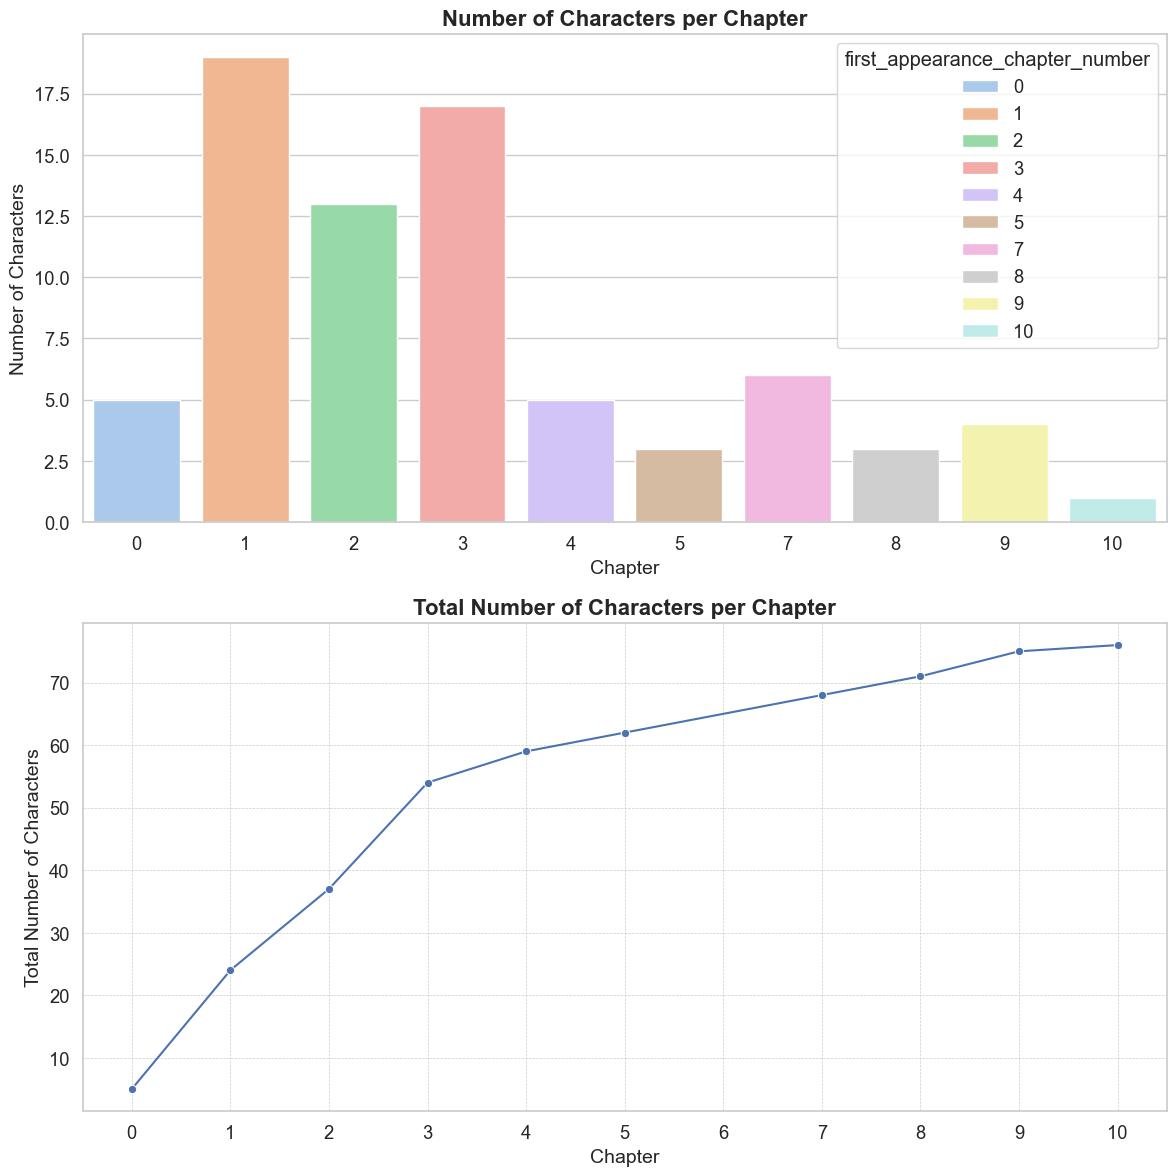

In [113]:
sns.set_theme(style="whitegrid", font_scale=1.2)

custom_palette = sns.color_palette("pastel", n_colors=characters_per_chapter['first_appearance_chapter_number'].nunique())

min_chapter = characters_per_chapter['first_appearance_chapter_number'].min()
max_chapter = characters_per_chapter['first_appearance_chapter_number'].max()
ticks = np.arange(int(min_chapter), int(max_chapter) + 1, 1)

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

print(characters_per_chapter)

sns.barplot(x='first_appearance_chapter_number', y='characters', data=characters_per_chapter, palette=custom_palette, ax=axs[0], hue='first_appearance_chapter_number')
axs[0].set_title('Number of Characters per Chapter', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Chapter', fontsize=14)
axs[0].set_ylabel('Number of Characters', fontsize=14)

sns.lineplot(x='first_appearance_chapter_number', y='total_characters', data=characters_per_chapter, marker='o', color='b', ax=axs[1])
axs[1].set_title('Total Number of Characters per Chapter', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Chapter', fontsize=14)
axs[1].set_ylabel('Total Number of Characters', fontsize=14)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].set_xticks(ticks)

plt.tight_layout()

fig.savefig('src/data/figures/characters_and_total_characters_per_chapter.png', dpi=300)

for i, ax in enumerate(axs):
    extent = ax.get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())

    if i == 0:
        name = 'characters_per_chapter'
    else:
        name = 'total_characters_per_chapter'
    fig.savefig(f'src/data/figures/{name}.png', bbox_inches=extent.expanded(1.07, 1.07), dpi=300)

In [114]:
def get_top_k_characters_by_words(df, k):
    return df.groupby('speaker')['word_count'].sum().sort_values(ascending=False).head(k)

top_10_characters_by_words = get_top_k_characters_by_words(df, 10)

# Create a custom palette with a color for each character
custom_palette = sns.color_palette("pastel", n_colors=unique_characters_df['character'].nunique())

def get_color_map(characters, palette):
    return {character: color for character, color in zip(characters, palette)}

color_map = get_color_map(unique_characters_df['character'], custom_palette)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_characters_by_words.values, y=top_10_characters_by_words.index, palette=color_map, hue=top_10_characters_by_words.index)
plt.title('Top 10 Characters by Number of Words Spoken', fontsize=16, fontweight='bold')
plt.xlabel('Number of Words Spoken', fontsize=14)
plt.ylabel('Character', fontsize=14)
plt.tight_layout()
plt.savefig('src/data/figures/top_10_characters_by_words_spoken.png', dpi=300)

KeyError: 'speaker'

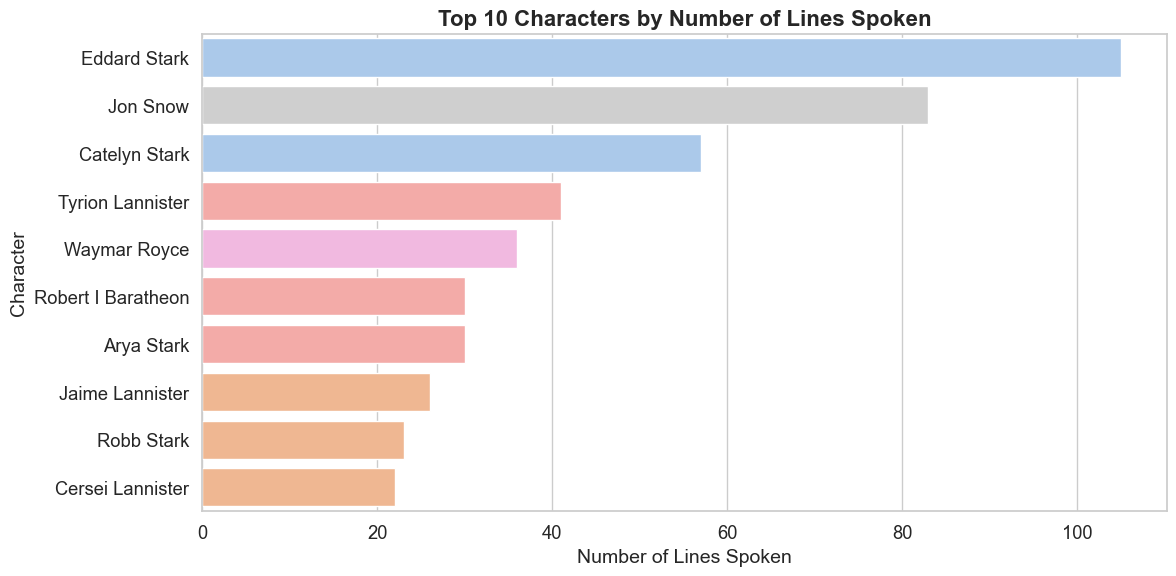

In [ ]:
def get_top_k_characters_by_lines(df, k):
    return df.groupby('speaker').size().sort_values(ascending=False).head(k)

top_10_characters_by_lines = get_top_k_characters_by_lines(df, 10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_characters_by_lines.values, y=top_10_characters_by_lines.index, palette=color_map, hue=top_10_characters_by_lines.index)
plt.title('Top 10 Characters by Number of Lines Spoken', fontsize=16, fontweight='bold')
plt.xlabel('Number of Lines Spoken', fontsize=14)
plt.ylabel('Character', fontsize=14)
plt.tight_layout()
plt.savefig('src/data/figures/top_10_characters_by_lines_spoken.png', dpi=300)

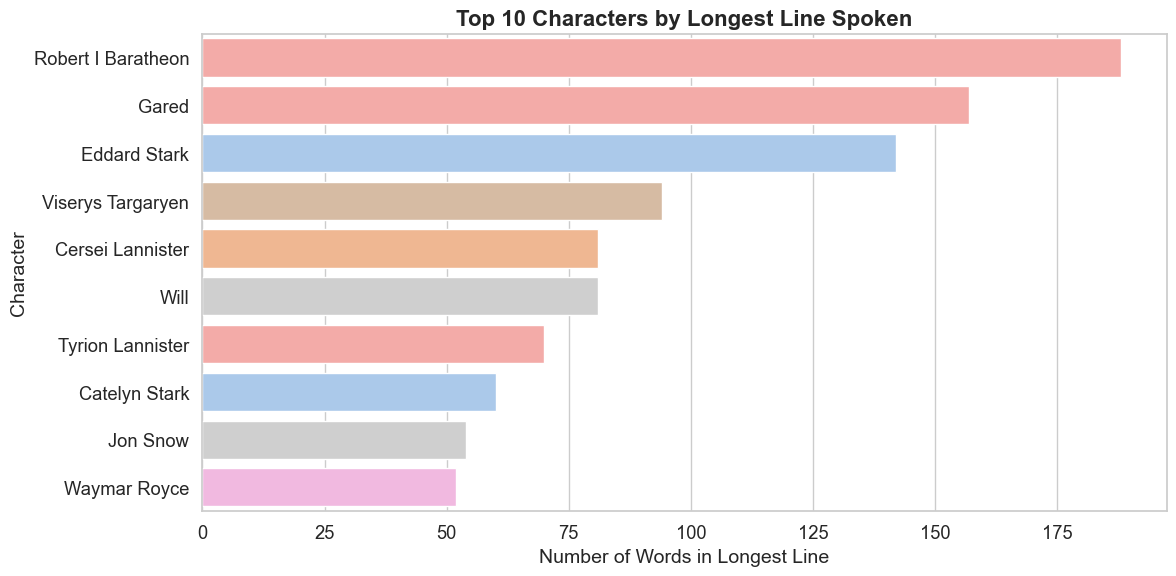

In [ ]:
def get_top_k_characters_by_longest_line(df, k):
    return df.groupby('speaker')['word_count'].max().sort_values(ascending=False).head(k)

top_10_characters_by_longest_line = get_top_k_characters_by_longest_line(df, 10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_characters_by_longest_line.values, y=top_10_characters_by_longest_line.index, palette=color_map, hue=top_10_characters_by_longest_line.index)
plt.title('Top 10 Characters by Longest Line Spoken', fontsize=16, fontweight='bold')
plt.xlabel('Number of Words in Longest Line', fontsize=14)
plt.ylabel('Character', fontsize=14)
plt.tight_layout()
plt.savefig('src/data/figures/top_10_characters_by_longest_line_spoken.png', dpi=300)